<a href="https://colab.research.google.com/github/Dimisz/Portfolio/blob/main/Python/DeepLearning/TensorFlow/ComputerVision/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Identification: Multiclass Classification.


In [36]:
# imports 
from matplotlib.pyplot import imread
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os

## 1. Data

Data is downloaded [from Kaggle](https://www.kaggle.com/c/dog-breed-identification/data). The data file is too big to put it into GitHub repo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !unzip -q "/content/drive/MyDrive/DogVision/dog-breed-identification.zip" -d "/content/drive/MyDrive/DogVision/unpacked"

### Prepare the data 

In [3]:
# Check the labels
labels_csv = pd.read_csv("/content/drive/MyDrive/DogVision/unpacked/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     84e567b15311f0c891858f56f0175867  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


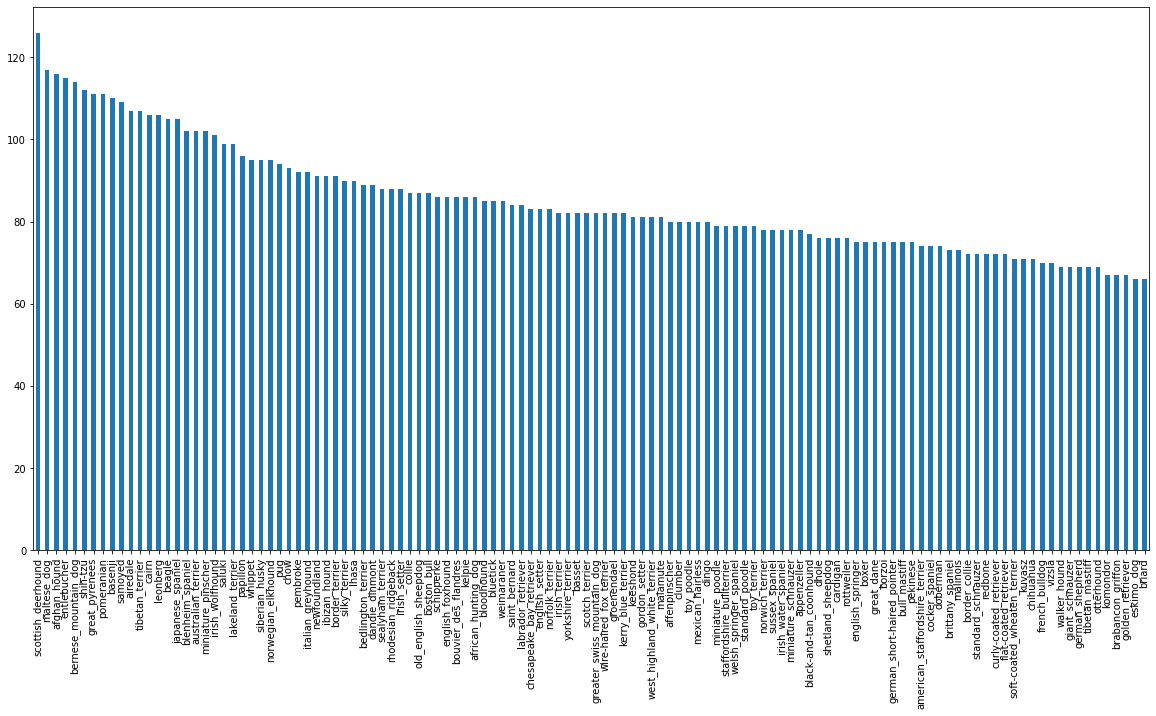

In [4]:
# How many images are there per each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [5]:
# Explore how balanced is the dataset
labels_csv['breed'].value_counts().min(), labels_csv['breed'].value_counts().max(), labels_csv['breed'].value_counts().mean(),  

(66, 126, 85.18333333333334)

For image classification at least 10 images per label needed.

Our dataset fulfills the requirement, it could be better though, since 100 images per label is recommended.

### Prepare the images

In [6]:
from IPython.display import Image

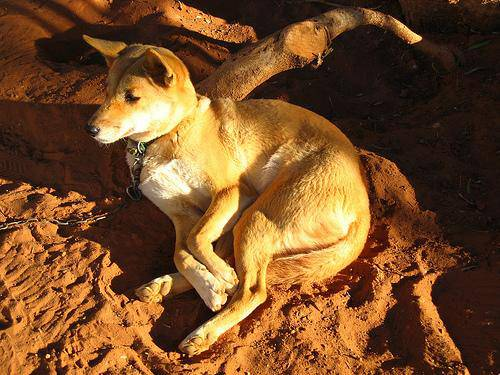

In [7]:
Image("drive/MyDrive/DogVision/unpacked/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

#### Get a list of all of our images pathnames

In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
# Pathnames for images ids
filenames = ["drive/MyDrive/DogVision/unpacked/train/"+fname+".jpg" for fname in labels_csv['id']]
filenames[:10]

['drive/MyDrive/DogVision/unpacked/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/unpacked/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/unpacked/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/unpacked/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/unpacked/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/unpacked/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/unpacked/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/unpacked/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/unpacked/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/unpacked/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
# Check whether number of filenames matched number of actual image files
if len(os.listdir("drive/MyDrive/DogVision/unpacked/train/")) == len(filenames):
  print("Filenames match actual amount of files! Proceed!")
else:
  print("Filenames do not match actual amount of files. Check the target directory.")

Filenames match actual amount of files! Proceed!


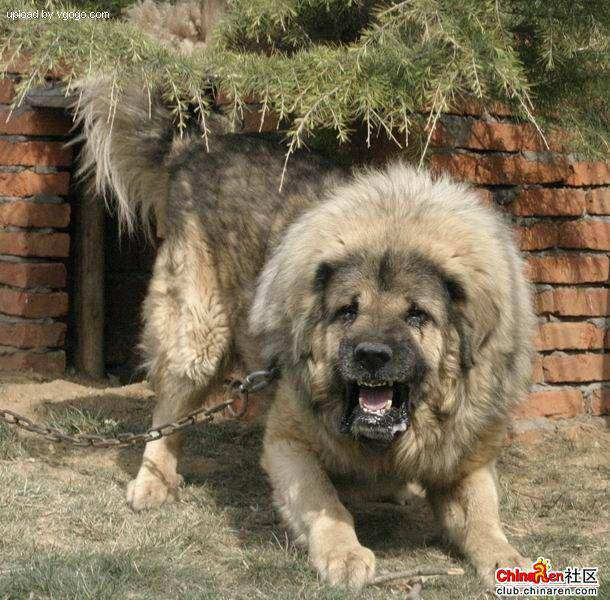

In [11]:
# Manual check
Image(filenames[9000])

In [12]:
labels_csv["breed"][9000]

'tibetan_mastiff'

### Convert the labels into numbers

In [13]:
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

In [15]:
# Compare the number of labels to the number of filenames
if len(labels) == len(filenames):
  print("Equal")
else:
  print("Not equal")

Equal


In [16]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
len(boolean_labels)

10222

### Create our own validation set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = filenames
y = boolean_labels

We're going to start with 1000 images

In [21]:
# Set nnumber of images to use for experimenting

NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max:10000, step:1000}

In [29]:
# Split our data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

In [30]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [31]:
X_train[:2], y_train[:2]

(['drive/MyDrive/DogVision/unpacked/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/DogVision/unpacked/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

### Convert images into tensors

1. Take an image filepath as input
2. Use tensorflow to read the file and save it to a variable `jpg image`
3. Turn the `jpg image` into tensors
4. Normalize the image
5. Resize the `jpg image` into (224, 224)
6. Return the modified image

In [32]:
# Convert an image into a numpy array
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [37]:
# Turn image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [38]:
# Make a function to preprocess images
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image filepath and turns an image into a tensor
  """
  # read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to the target image size (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Create batches

In [39]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label
  Processes the image and returns a tuple of (image, label)
  """
  
  image = process_image(image_path)

  return image, label

In [40]:
# Try of the function
try_index = random.randint(0,len(X)-1)
try_result = get_image_label(X[try_index], y[try_index])
try_result

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.69698596, 0.76757425, 0.91659385],
         [0.58525914, 0.65133053, 0.7958334 ],
         [0.5912115 , 0.6464286 , 0.78384113],
         ...,
         [0.6622079 , 0.6740141 , 0.80340517],
         [0.6619312 , 0.6742908 , 0.80340517],
         [0.66181135, 0.6744107 , 0.80340517]],
 
        [[0.7012868 , 0.7718751 , 0.9208947 ],
         [0.5868085 , 0.6528799 , 0.7973828 ],
         [0.5912738 , 0.6464909 , 0.78390336],
         ...,
         [0.65556735, 0.6706835 , 0.7984507 ],
         [0.6534664 , 0.6719544 , 0.7984507 ],
         [0.6525561 , 0.672505  , 0.7984507 ]],
 
        [[0.7062413 , 0.7768296 , 0.9258492 ],
         [0.591763  , 0.6578344 , 0.8023373 ],
         [0.5939514 , 0.6491685 , 0.786581  ],
         ...,
         [0.64555466, 0.66810966, 0.7934962 ],
         [0.6420703 , 0.6694931 , 0.7934962 ],
         [0.6405606 , 0.6700925 , 0.7934962 ]],
 
        ...,
 
        [[0.82339805, 0.8390843 

Apply the above functions to make all of our data into batches

In [41]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (that doesn't have labels).
  """
  if test_data: # no labels here
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mmapping image processor function
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples
    data = data.map(get_image_label)

    # Turn the training data into batches 
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [42]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [43]:
# Check out the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches

In [44]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the gridlines off
    plt.axis("off")

In [45]:
train_images, train_labels = next(train_data.as_numpy_iterator())

len(train_images), len(train_labels)

(32, 32)

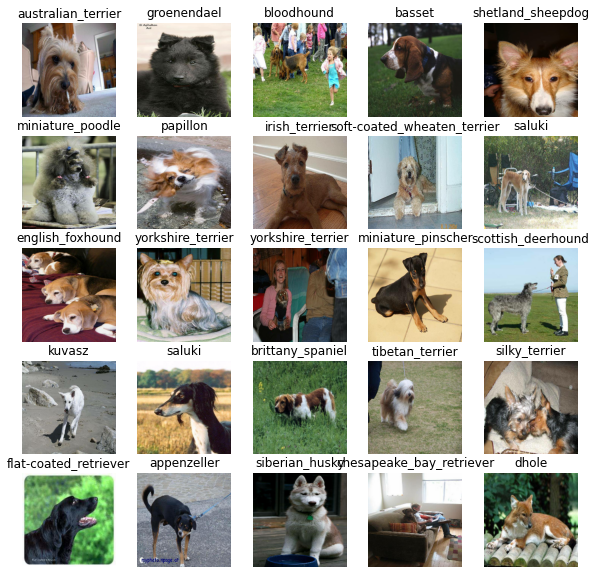

In [47]:
# Visualize training set
show_25_images(train_images, train_labels)

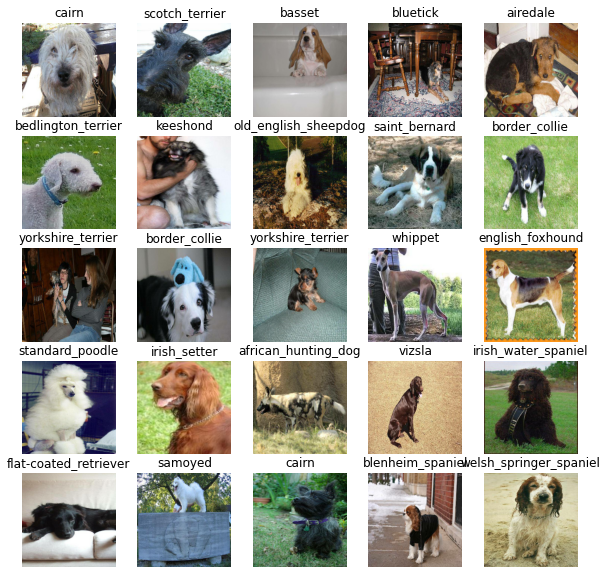

In [48]:
# Visualize validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)